In [25]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [39]:
london = pd.read_csv('london_weekdays.csv')
london = london.drop(columns=['Unnamed: 0'])

#To remove outliers from realSum 
# Calculate the quartiles
Q1 = london['realSum'].quantile(0.25)
Q3 = london['realSum'].quantile(0.75)

# Remove outliers of realSum
london = london.loc[((london['realSum'] > (Q1 - 1.5 * (Q3 - Q1))) & (london['realSum'] < (Q3 + 1.5 * (Q3 - Q1))))]
london.shape

#Apply categorical label to columns 
london[['room_type', 'room_shared', 'room_private', 'host_is_superhost', 'multi', 'biz']].apply(lambda x: x.astype('category'))

#Convert Roomtype to oridinal 
london["room_type"] = london["room_type"].replace({'Shared room': 0, 'Private room': 1, 'Entire home/apt': 2})
london.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,570.098074,2,False,False,2.0,False,0,0,10.0,98.0,1,5.301018,1.588990,209.632578,14.571793,467.597522,8.372724,-0.16032,51.46531
1,297.984430,1,False,True,2.0,True,1,0,10.0,99.0,1,2.198946,0.379262,553.891744,38.501630,961.472137,17.215961,-0.09683,51.50343
2,336.790611,1,False,True,2.0,False,1,0,10.0,96.0,1,2.322958,0.453178,428.287849,29.770764,959.042839,17.172462,-0.10554,51.52407
3,226.722171,1,False,True,2.0,True,1,0,10.0,99.0,1,5.707825,1.723977,195.694744,13.602959,452.232472,8.097600,-0.16575,51.46292
4,256.355982,1,False,True,3.0,False,0,0,9.0,98.0,1,3.257945,0.825417,329.477068,22.902317,735.327280,13.166649,-0.12055,51.53728


# Adaboost references 
https://www.analyticsvidhya.com/blog/2021/09/adaboost-algorithm-a-complete-guide-for-beginners/

https://machinelearningmastery.com/adaboost-ensemble-in-python/

Data Preparation for AdaBoost

This section lists some heuristics for best preparing your data for AdaBoost.

- Quality Data: Because the ensemble method continues to attempt to correct misclassifications in the training data, you need to be careful that the training data is of a high-quality.
    
- Outliers: Outliers will force the ensemble down the rabbit hole of working hard to correct for cases that are unrealistic. These could be removed from the training dataset.
    
- Noisy Data: Noisy data, specifically noise in the output variable can be problematic. If possible, attempt to isolate and clean these from your training dataset.


In [42]:
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(london["realSum"])
x = pd.DataFrame(london[["person_capacity", "bedrooms", "dist", "attr_index_norm", "rest_index_norm", "room_type", "biz"]])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(x_train.head())

(3493, 7)
(874, 7)
(3493, 1)
(874, 1)
      person_capacity  bedrooms       dist  attr_index_norm  rest_index_norm  \
1275              2.0         1  10.609293         8.692788         4.447210   
3281              3.0         1   4.868647        19.420477        13.743548   
2341              2.0         1   3.249375        23.975780        14.038143   
4435              2.0         0   3.935016        33.603862        14.188705   
1959              2.0         0   4.584926        20.662756        12.017558   

      room_type  biz  
1275          2    0  
3281          1    0  
2341          2    0  
4435          2    1  
1959          2    1  


Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.648853397679876
Mean Squared Error (MSE) 	: 10794.878140008943



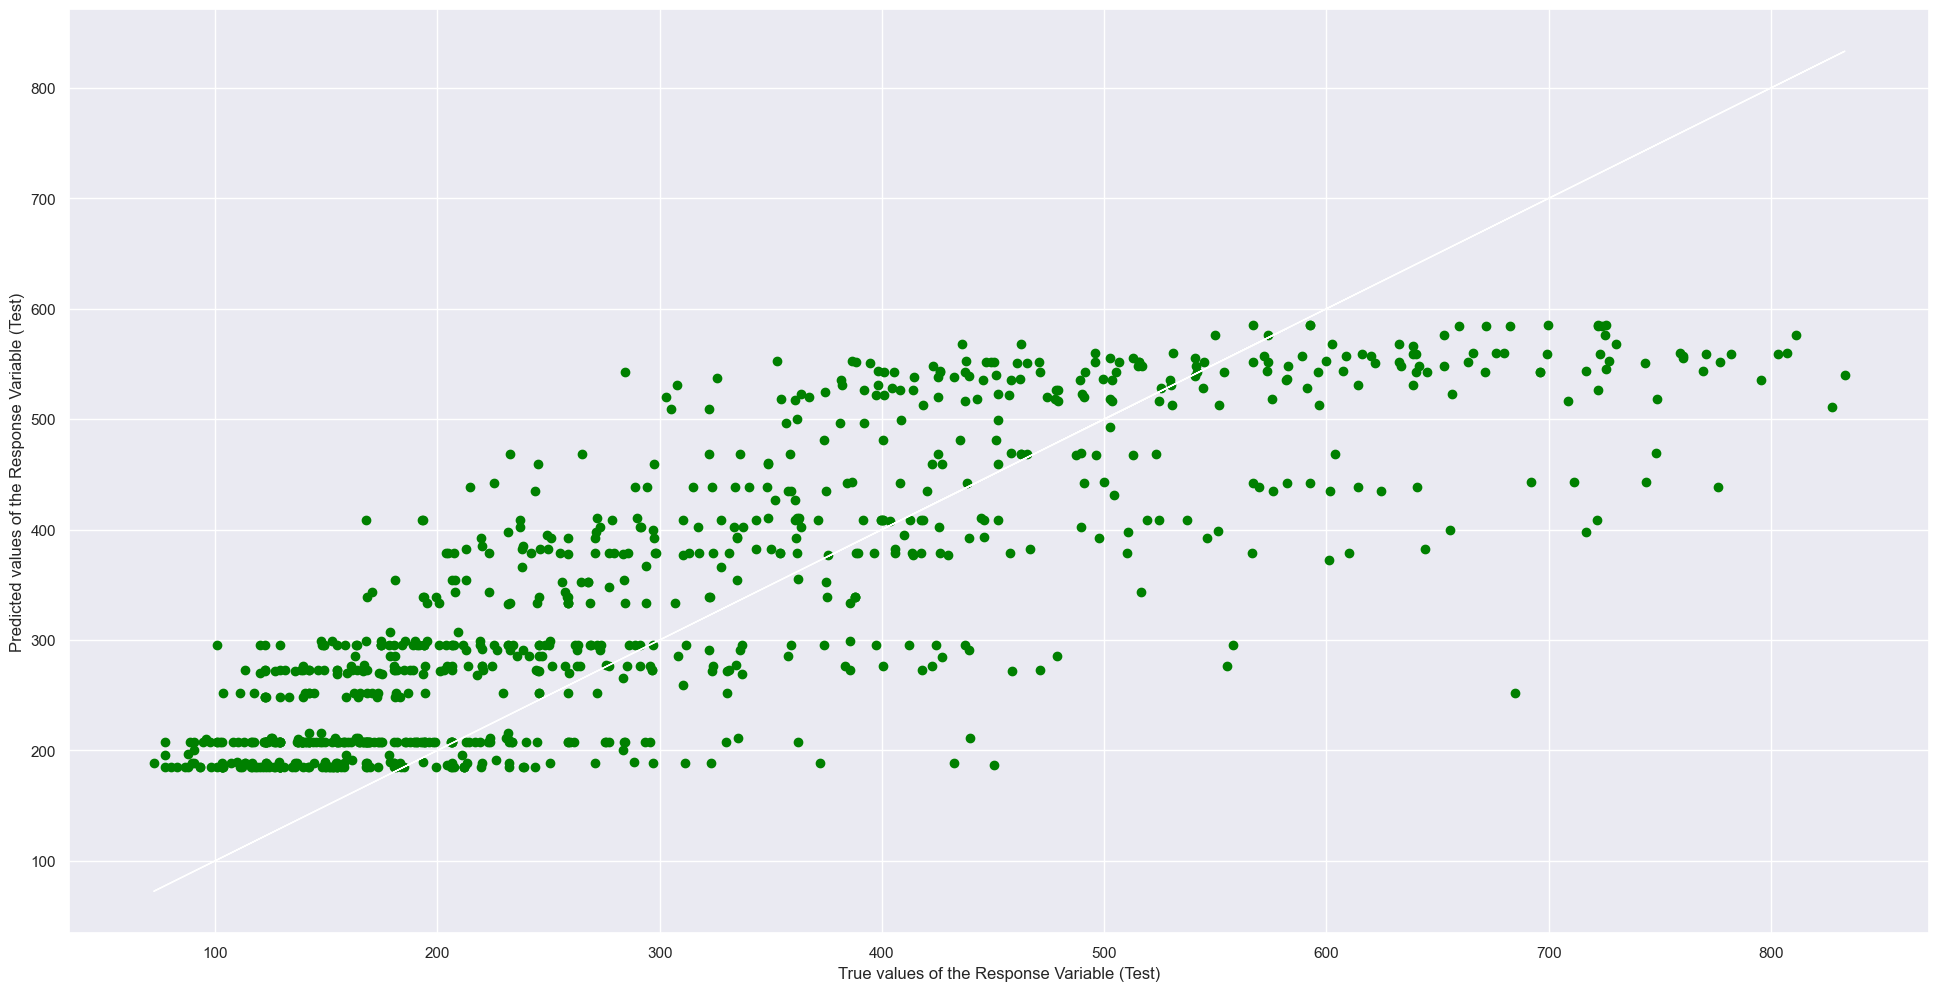

In [44]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

#To do: Explore tuning parameter for model
model = AdaBoostRegressor(n_estimators=50, learning_rate=0.2,loss='exponential')
model.fit(x_train, y_train.values.ravel())

#Prediction using test data set 
y_test_pred = model.predict(x_test)


# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 1, figsize=(24, 12))
axes.scatter(y_test, y_test_pred, color = "green")
axes.plot(y_test, y_test, 'w-', linewidth = 1)
axes.set_xlabel("True values of the Response Variable (Test)")
axes.set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()